# Práctico 2 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

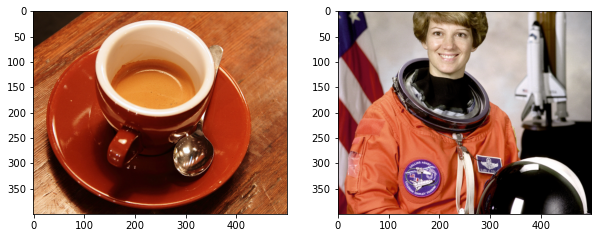

In [8]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

Text(0.5, 1.0, 'Suma clampeada en RGB')

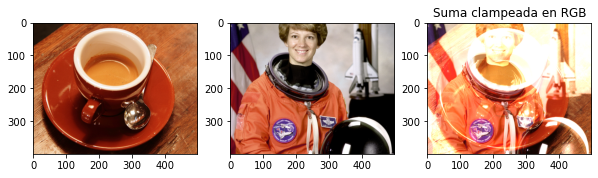

In [37]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Suma clampeada en RGB')

Text(0.5, 1.0, 'Diferencia clampeada en RGB')

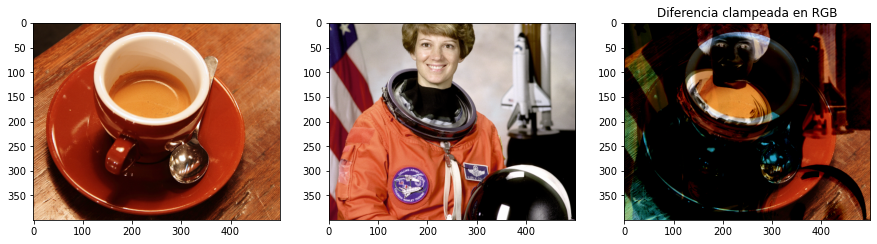

In [52]:
# Diferencia campleanda en RGB
img_4 = np.clip(img_1 - img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_4)
axes[2].set_title('Diferencia clampeada en RGB')



Text(0.5, 1.0, 'Suma promediada en RGB')

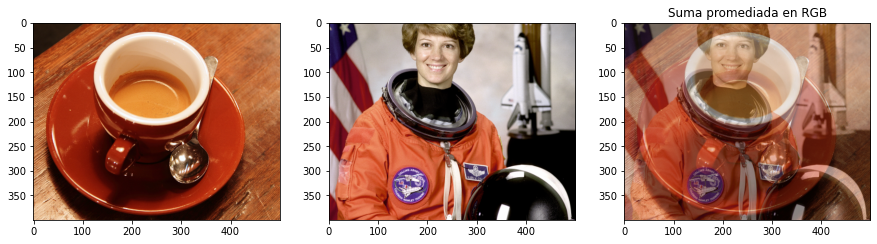

In [53]:
# SUMA promediada en RGB

img_5 = (img_1 + img_2)/2
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_5)
axes[2].set_title('Suma promediada en RGB')


Text(0.5, 1.0, 'Diferencia promediada en RGB')

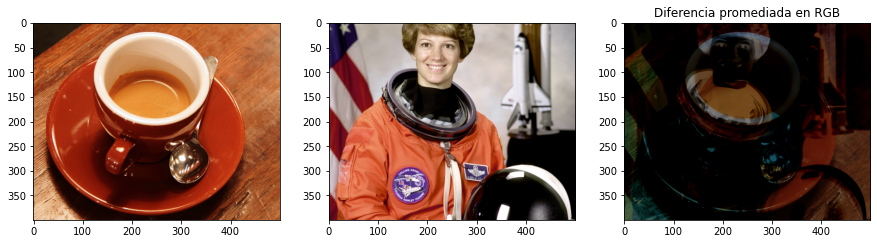

In [49]:
# Resta promediada en RGB

img_6 = (img_1 - img_2)/2
img_6b = np.clip(img_6 , 0, 1) 
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_6b)
axes[2].set_title('Diferencia promediada en RGB')

Text(0.5, 1.0, 'SUMA campleada en YIQ')

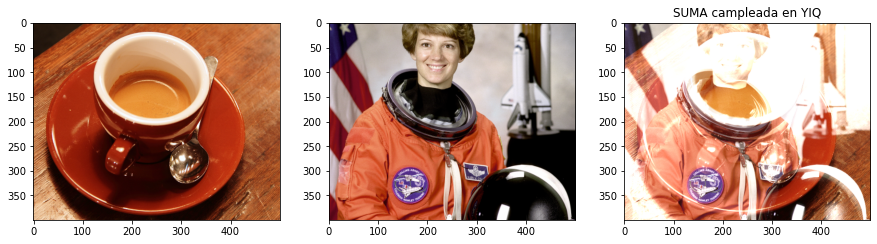

In [72]:
# SUMA campleada en YIQ
img_1_y = rgb2yiq(img_1)
img_2_y = rgb2yiq(img_2)

img_7_y = np.zeros(img_1.shape)
img_7 = np.zeros(img_1.shape)

img_7_y[:,:,0]= img_1_y[:,:,0] + img_2_y[:,:,0] # suma 

# Interpolación: 
img_7_y[:,:,1]= [(img_1_y[:,:,0]* img_1_y[:,:,1]) + (img_2_y[:,:,0]* img_2_y[:,:,1])] / (img_1_y[:,:,0] + img_2_y[:,:,0]) # canal I
img_7_y[:,:,2]= [(img_1_y[:,:,0]* img_1_y[:,:,2]) + (img_2_y[:,:,0]* img_2_y[:,:,2])] / (img_1_y[:,:,0] + img_2_y[:,:,0]) # canal Q

img_7 = yiq2rgb(img_7_y)
img_7 = np.clip(img_7 , 0, 1)  # campleo en RGB
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_7)
axes[2].set_title('SUMA campleada en YIQ')

Text(0.5, 1.0, 'SUMA promediada en RGB')

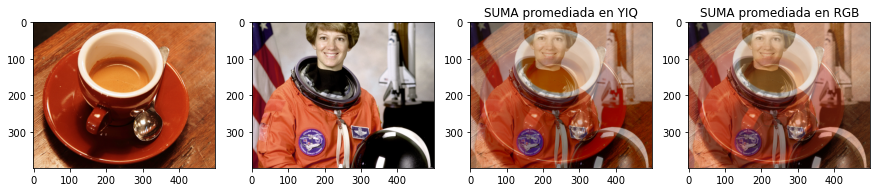

In [70]:
# SUMA promediada en YIQ
img_8_y= np.zeros(img_1.shape)
img_8 = np.zeros(img_1.shape)

img_8_y[:,:,0] = (img_1_y[:,:,0] + img_2_y[:,:,0])/2 # suma promediada

# Interpolación: 
img_8_y[:,:,1]= [(img_1_y[:,:,0]* img_1_y[:,:,1]) + (img_2_y[:,:,0]* img_2_y[:,:,1])] / (img_1_y[:,:,0] + img_2_y[:,:,0]) # canal I
img_8_y[:,:,2]= [(img_1_y[:,:,0]* img_1_y[:,:,2]) + (img_2_y[:,:,0]* img_2_y[:,:,2])] / (img_1_y[:,:,0] + img_2_y[:,:,0]) # canal Q

img_8=yiq2rgb(img_8_y)
img_8 = np.clip(img_8 , 0, 1) 

fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_8)
axes[2].set_title('SUMA promediada en YIQ')
axes[3].imshow(img_5)
axes[3].set_title('SUMA promediada en RGB')




In [23]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]


In [57]:
# if-darker e if-lighther:
def select_mask(img_1, img_2, op1, op2):
    img_10 = np.zeros(img_1.shape)
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
   

   
    mask = op1(img_1_y, img_2_y)
    img_10[mask] = img_1[mask]
    
    mask = op2(img_1_y, img_2_y)
    img_10[mask] = img_2[mask]
    
    return img_10

def if_darker(img_1, img_2):
    return select_mask(img_1, img_2, lambda x,y: x<y, lambda x,y: x>=y)

def if_lighther(img_1, img_2):
    return select_mask(img_1, img_2, lambda x,y: x>y, lambda x,y: x<=y)







Text(0.5, 1.0, 'if_darker')

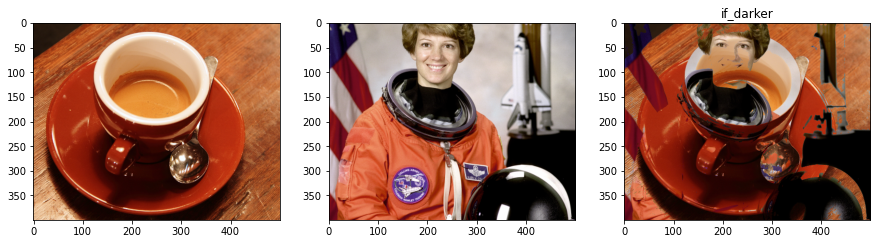

In [45]:
if_darker(img_1, img_2)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(if_darker(img_1, img_2))
axes[2].set_title('if_darker')

Text(0.5, 1.0, 'if_lighther')

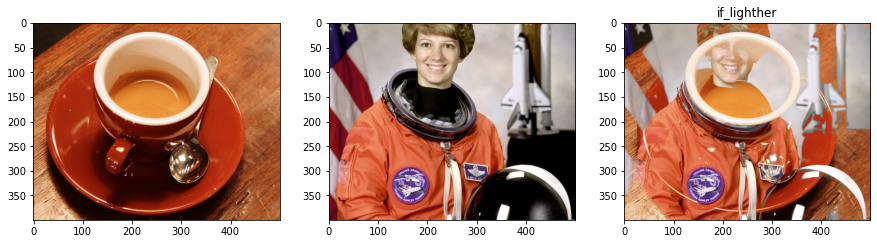

In [56]:
if_lighther(img_1, img_2)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(if_lighther(img_1, img_2))
axes[2].set_title('if_lighther')